In [4]:
import warnings
warnings.filterwarnings("ignore")


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted", font_scale=1.1)


class InsuranceEDA:
    def __init__(self, file_path):
        # Load dataset
        self.df = pd.read_csv(file_path)
        
        # Data cleaning
        self.df['authorities_contacted'] = self.df['authorities_contacted'].fillna("Unknown")
        self.df['policy_bind_date'] = pd.to_datetime(self.df['policy_bind_date'], errors='coerce')
        self.df['incident_date'] = pd.to_datetime(self.df['incident_date'], errors='coerce')
        
        print("Dataset Loaded Successfully!")
        print(self.df.info())
    
    # ---------- Customer & Policy ----------
    def customer_policy_distribution(self):
        fig, ax = plt.subplots(1,2, figsize=(14,5))
        sns.histplot(self.df['months_as_customer'], bins=30, kde=True, color="steelblue", ax=ax[0])
        ax[0].set_title("Months as Customer")
        
        sns.histplot(self.df['policy_annual_premium'], bins=40, kde=True, color="salmon", ax=ax[1])
        ax[1].set_title("Policy Annual Premium")
        plt.show()
        
        plt.figure(figsize=(8,5))
        sns.countplot(y="policy_state", data=self.df, order=self.df['policy_state'].value_counts().index, palette="viridis")
        plt.title("Policy Distribution by State")
        plt.show()
    
    # ---------- Demographics ----------
    def demographics(self):
        plt.figure(figsize=(6,4))
        sns.countplot(x="insured_sex", data=self.df, palette="pastel")
        plt.title("Gender Distribution")
        plt.show()
        
        plt.figure(figsize=(10,5))
        sns.countplot(y="insured_education_level", data=self.df, 
                      order=self.df['insured_education_level'].value_counts().index, palette="coolwarm")
        plt.title("Education Level")
        plt.show()
        
        plt.figure(figsize=(12,6))
        sns.countplot(y="insured_occupation", data=self.df, 
                      order=self.df['insured_occupation'].value_counts().head(15).index, palette="Set2")
        plt.title("Top 15 Occupations")
        plt.show()
    
    # ---------- Incident Analysis ----------
    def incident_analysis(self):
        plt.figure(figsize=(8,5))
        sns.countplot(y="incident_type", data=self.df, order=self.df['incident_type'].value_counts().index, palette="magma")
        plt.title("Incident Types")
        plt.show()
        
        plt.figure(figsize=(8,5))
        sns.countplot(y="collision_type", data=self.df, order=self.df['collision_type'].value_counts().index, palette="cubehelix")
        plt.title("Collision Types")
        plt.show()
        
        plt.figure(figsize=(10,5))
        sns.histplot(self.df['incident_hour_of_the_day'], bins=24, kde=False, color="teal")
        plt.title("Incidents by Hour of the Day")
        plt.show()
    
    # ---------- Claims & Fraud ----------
    def claims_and_fraud(self):
        plt.figure(figsize=(8,5))
        sns.histplot(self.df['total_claim_amount'], bins=30, kde=True, color="purple")
        plt.title("Total Claim Amount Distribution")
        plt.show()
        
        plt.figure(figsize=(8,5))
        sns.boxplot(x="fraud_reported", y="total_claim_amount", data=self.df, palette="Set1")
        plt.title("Claim Amount by Fraud Reported")
        plt.show()
        
        plt.figure(figsize=(6,4))
        sns.countplot(x="fraud_reported", data=self.df, palette="Paired")
        plt.title("Fraud Reported Distribution")
        plt.show()
    
    # ---------- Authorities Contacted ----------
    def authorities_contacted(self):
        plt.figure(figsize=(8,5))
        sns.countplot(y="authorities_contacted", data=self.df, 
                      order=self.df['authorities_contacted'].value_counts().index, palette="muted")
        plt.title("Authorities Contacted")
        plt.show()
        
        plt.figure(figsize=(10,6))
        sns.countplot(x="authorities_contacted", hue="fraud_reported", data=self.df, palette="husl")
        plt.title("Fraud Reported vs Authorities Contacted")
        plt.xticks(rotation=45)
        plt.show()
    
    # ---------- Correlation ----------
    def correlation_heatmap(self):
        num_df = self.df.select_dtypes(include=['int64','float64'])
        plt.figure(figsize=(12,8))
        sns.heatmap(num_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
        plt.title("Correlation Heatmap")
        plt.show()
    
    # ---------- Auto Insights ----------
    def auto_insights(self):
        plt.figure(figsize=(10,6))
        sns.countplot(y="auto_make", data=self.df, 
                      order=self.df['auto_make'].value_counts().head(10).index, palette="Spectral")
        plt.title("Top 10 Auto Makes")
        plt.show()
        
        plt.figure(figsize=(10,6))
        sns.countplot(y="auto_model", data=self.df, 
                      order=self.df['auto_model'].value_counts().head(10).index, palette="cividis")
        plt.title("Top 10 Auto Models")
        plt.show()


Dataset Loaded Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_educati

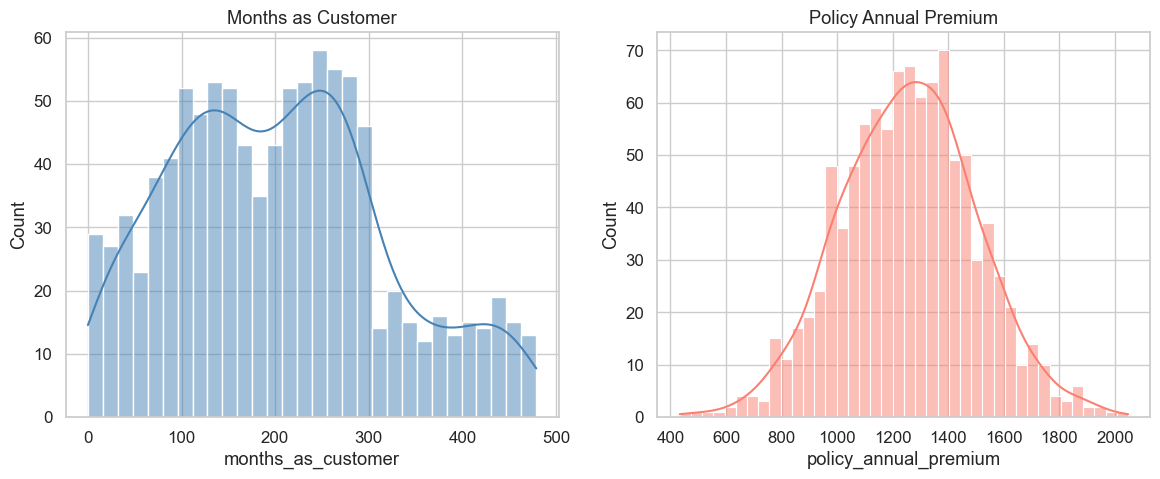

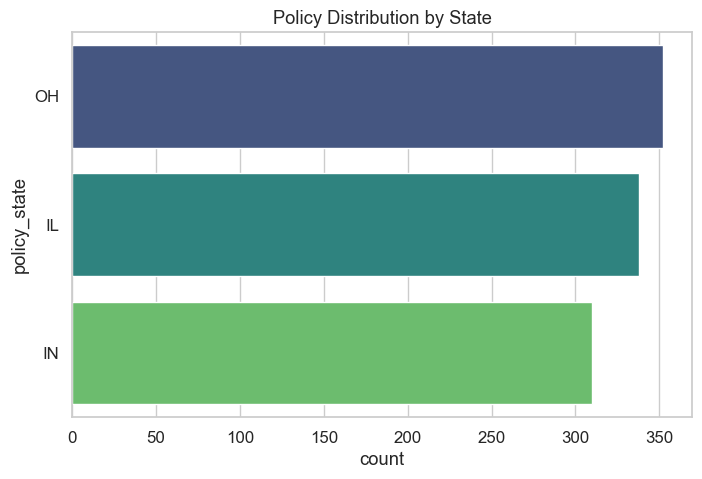

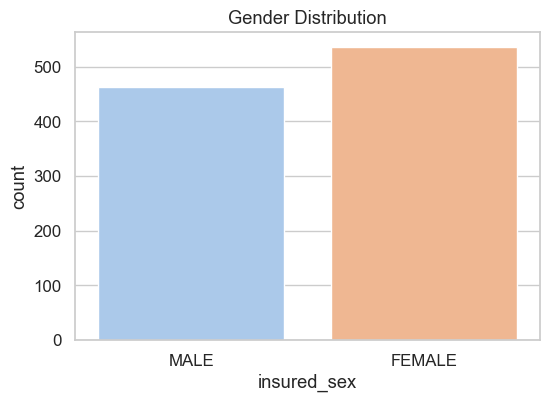

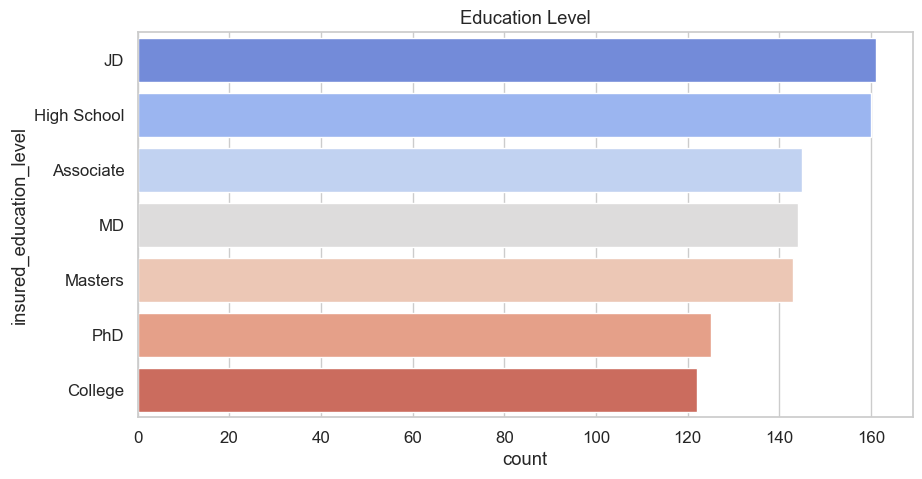

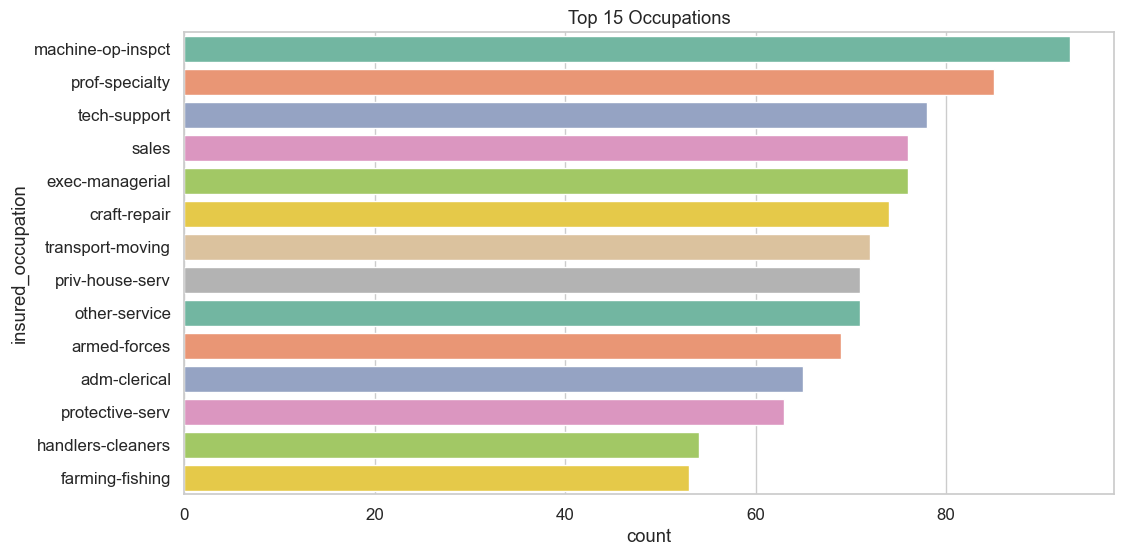

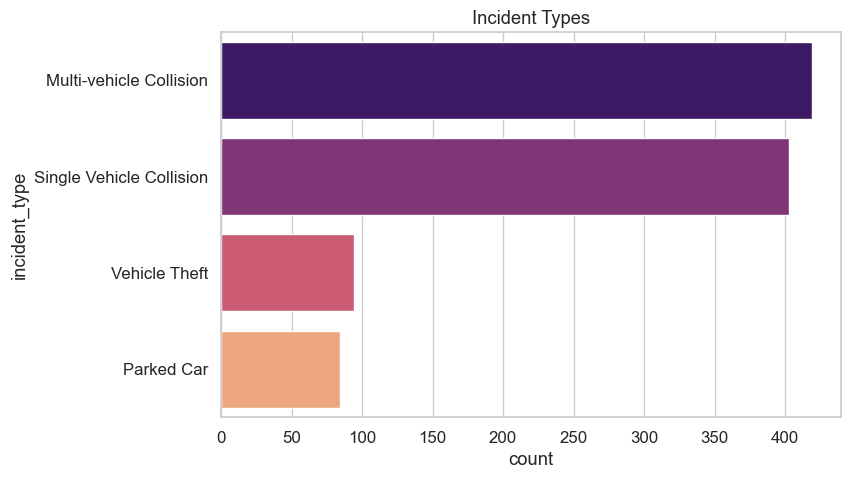

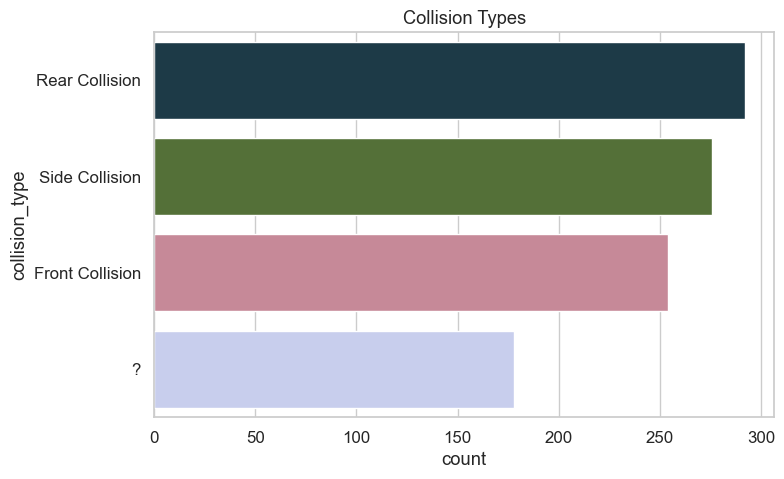

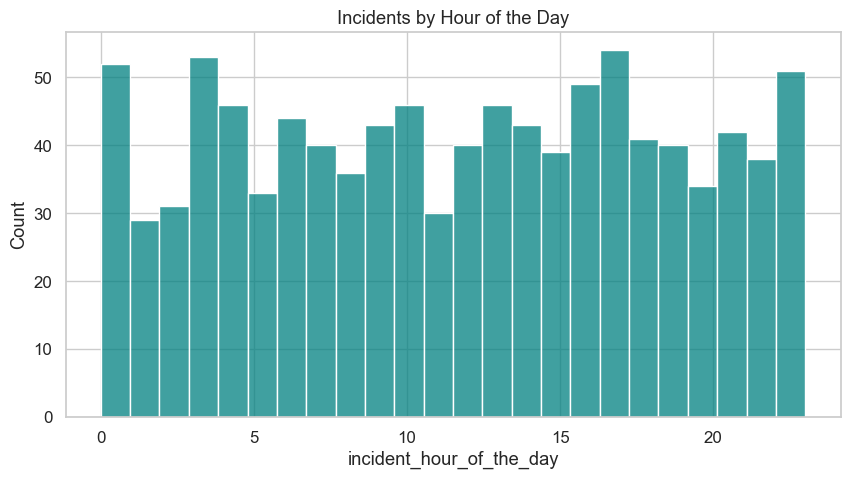

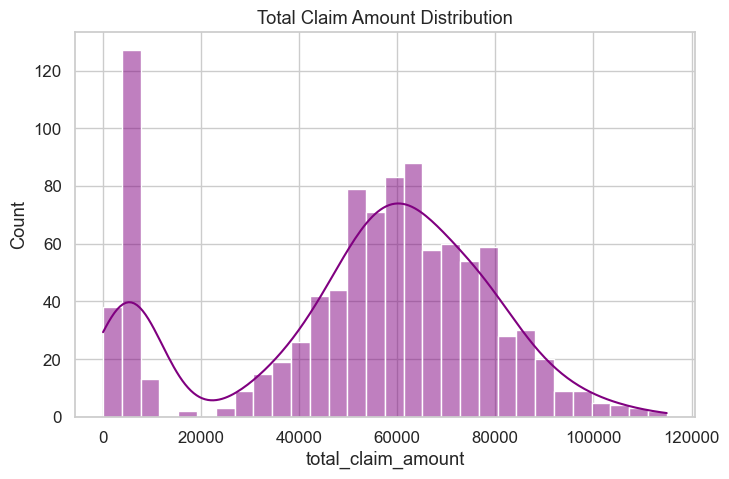

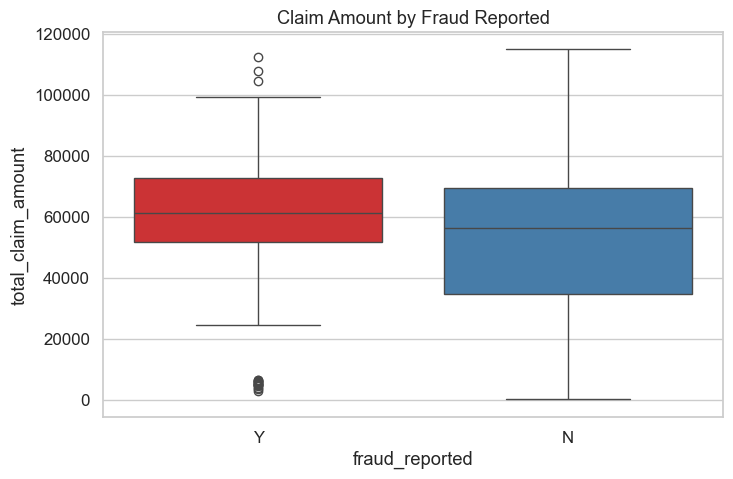

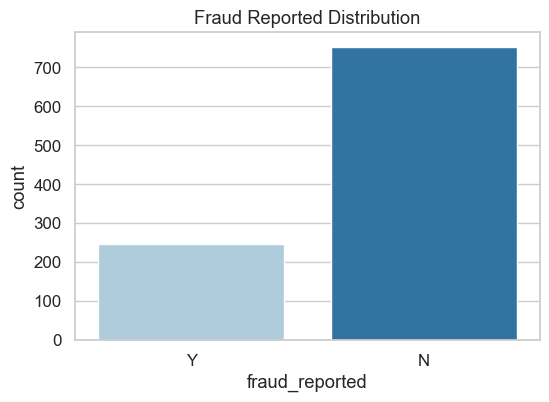

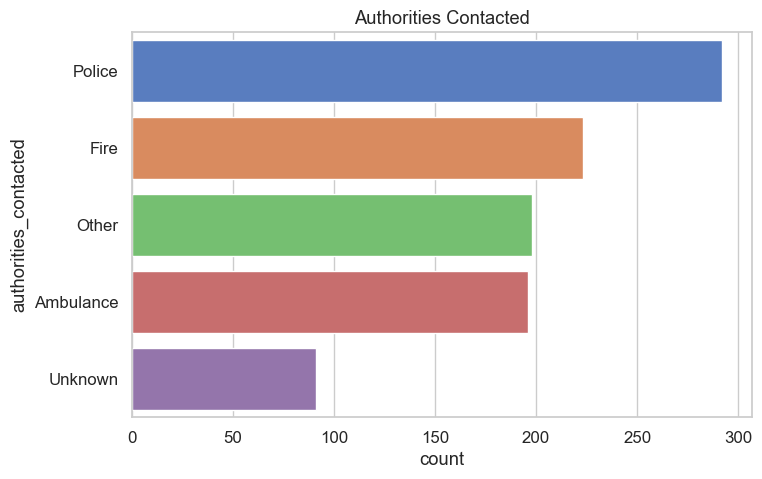

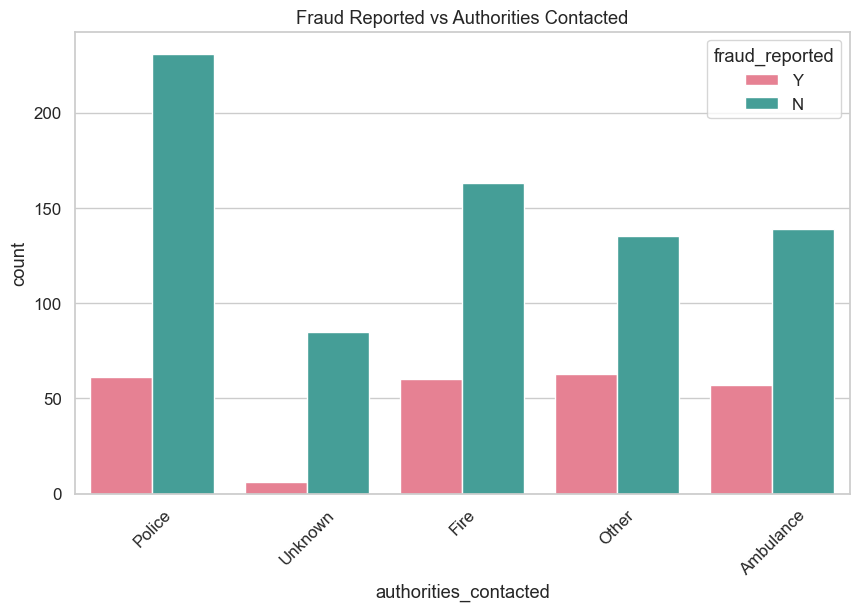

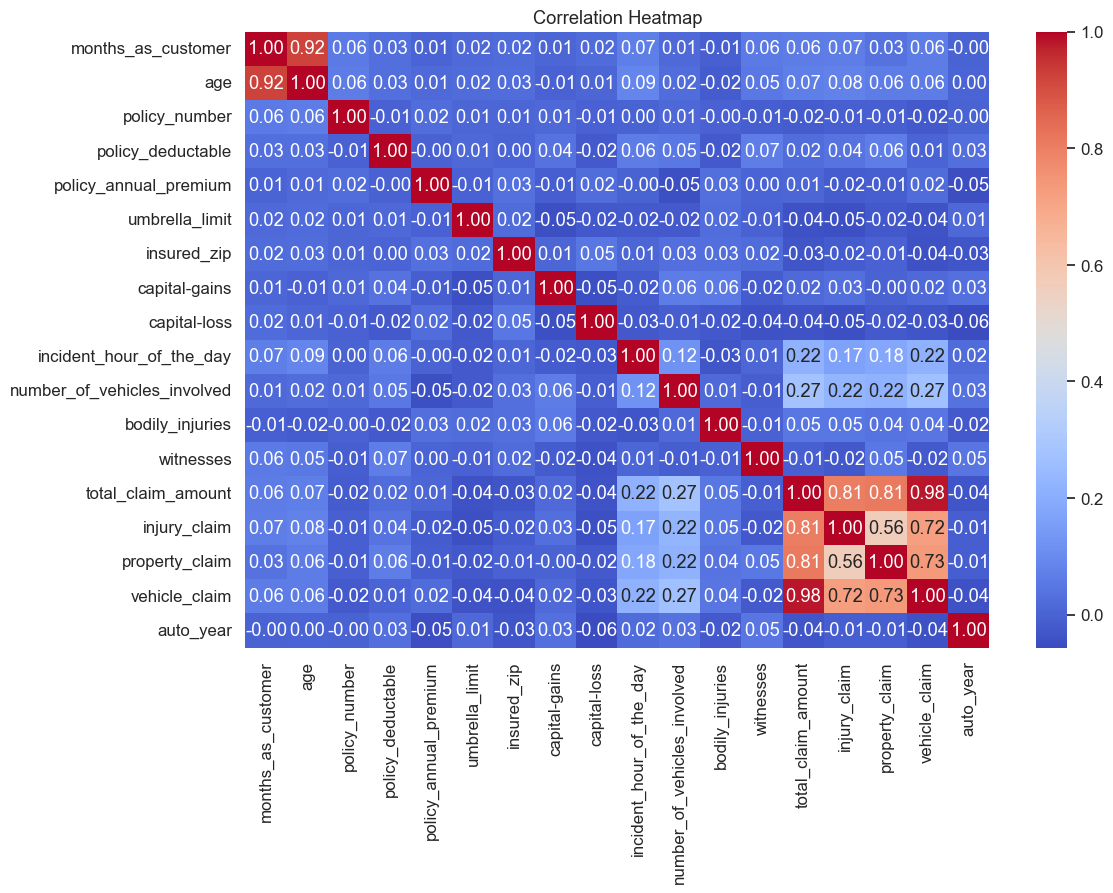

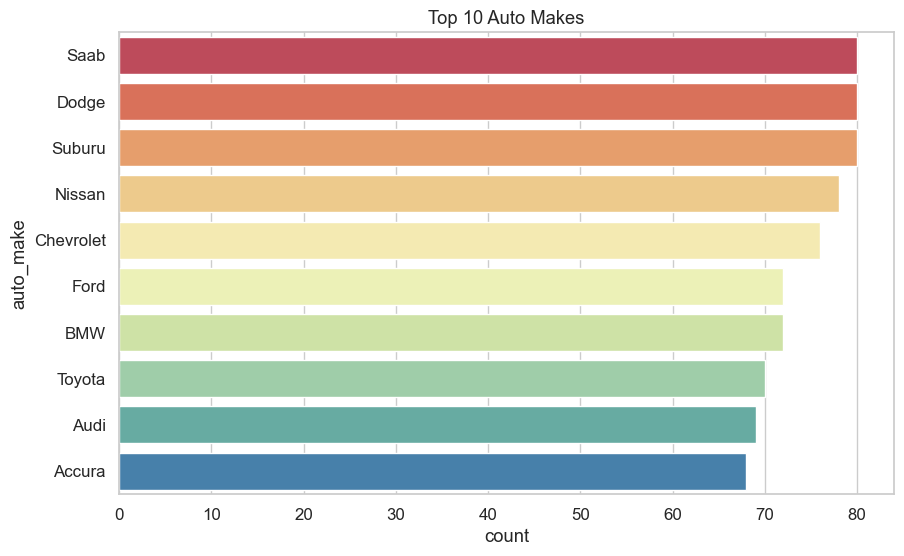

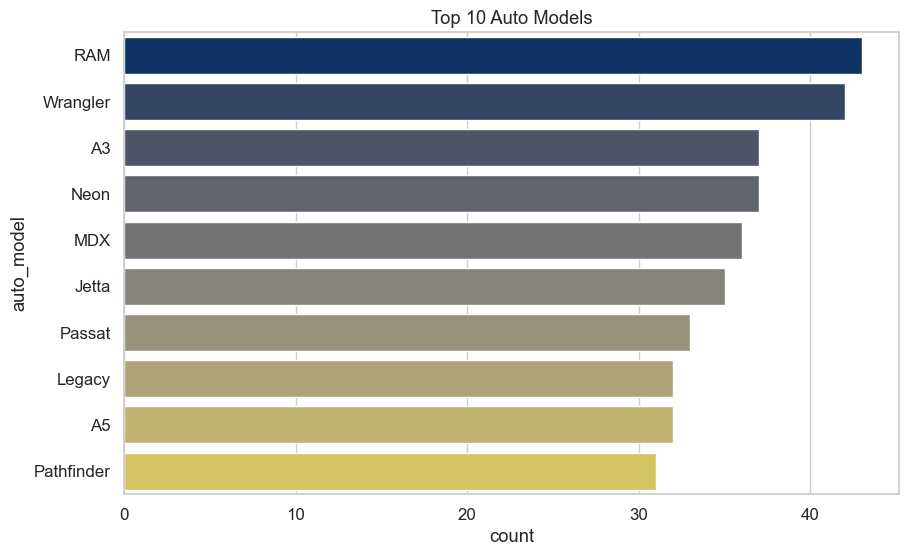

In [6]:
eda = InsuranceEDA("insurance_claims.csv")

# Run different analysis modules
eda.customer_policy_distribution()
eda.demographics()
eda.incident_analysis()
eda.claims_and_fraud()
eda.authorities_contacted()
eda.correlation_heatmap()
eda.auto_insights()
